# Augmentation

In [1]:
import shutil
import os

# Source and destination paths
source_dir = "/kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays"
destination_dir = "/kaggle/working/Augmented/Normal-Chest"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the directory
try:
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
    print(f"Directory copied from {source_dir} to {destination_dir}")
except Exception as e:
    print(f"Error: {e}")

Directory copied from /kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays to /kaggle/working/Augmented/Normal-Chest


In [2]:
import shutil
import os

# Source and destination paths
source_dir = "/kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays"
destination_dir = "/kaggle/working/Augmented/TB-Chest"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Copy the directory
try:
    shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)
    print(f"Directory copied from {source_dir} to {destination_dir}")
except Exception as e:
    print(f"Error: {e}")


Directory copied from /kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays to /kaggle/working/Augmented/TB-Chest


In [3]:
import os
from PIL import Image
import cv2
import numpy as np
from imgaug import augmenters as iaa



# Define paths
input_folder = r'/kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/Normal Chest X-rays'
# Output directory where augmented images will be saved
output_folder = r'/kaggle/working/Augmented/Normal-Chest'

# Create the output directory if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images

# Load the original images
images = load_images_from_folder(input_folder)

# Define an augmentation pipeline
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip
    iaa.Flipud(0.5),  # Vertical flip
    iaa.Multiply((0.6, 0.8)),  # Adjust brightness
    iaa.Affine(scale=(0.8, 1.0)),  # Zoom in/out by 80% to 120%
    iaa.Affine(rotate=(-10, 10)),  # Rotate by -20 to 20 degrees
    iaa.Crop(percent=(0, 0.2)),  # Crop images
])

# Number of augmentations per original image
augmentations_per_image = (2500 - len(images)) // len(images) + 1

# Augment and save images
augmented_count = 0
for i, image in enumerate(images):
    for _ in range(augmentations_per_image):
        augmented_image = seq(image=image)
        augmented_image_pil = Image.fromarray(augmented_image)
        output_path = os.path.join(output_folder, f'augmented_{i}_{augmented_count}.JPG')
        augmented_image_pil.save(output_path)
        augmented_count += 1
        if augmented_count >= (2500 - len(images)):
            break
    if augmented_count >= (2500 - len(images)):
        break

print(f"Augmented images saved in {output_folder}")

Augmented images saved in /kaggle/working/Augmented/Normal-Chest


In [4]:
import os
from PIL import Image
import cv2
import numpy as np
from imgaug import augmenters as iaa



# Define paths
input_folder = r'/kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays'
# Output directory where augmented images will be saved
output_folder = r'/kaggle/working/Augmented/TB-Chest'

# Create the output directory if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images

# Load the original images
images = load_images_from_folder(input_folder)

# Define an augmentation pipeline
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip
    iaa.Flipud(0.5),  # Vertical flip
    iaa.Multiply((0.6, 0.8)),  # Adjust brightness
    iaa.Affine(scale=(0.8, 1.0)),  # Zoom in/out by 80% to 120%
    iaa.Affine(rotate=(-10, 10)),  # Rotate by -20 to 20 degrees
    iaa.Crop(percent=(0, 0.2)),  # Crop images
])

# Number of augmentations per original image
augmentations_per_image = (2500 - len(images)) // len(images) + 1

# Augment and save images
augmented_count = 0
for i, image in enumerate(images):
    for _ in range(augmentations_per_image):
        augmented_image = seq(image=image)
        augmented_image_pil = Image.fromarray(augmented_image)
        output_path = os.path.join(output_folder, f'augmented_{i}_{augmented_count}.JPG')
        augmented_image_pil.save(output_path)
        augmented_count += 1
        if augmented_count >= (2500 - len(images)):
            break
    if augmented_count >= (2500 - len(images)):
        break

print(f"Augmented images saved in {output_folder}")

Augmented images saved in /kaggle/working/Augmented/TB-Chest


# EDA

                 Class  Number of Images
0      TB Chest X-rays              2494
1  Normal Chest X-rays               514


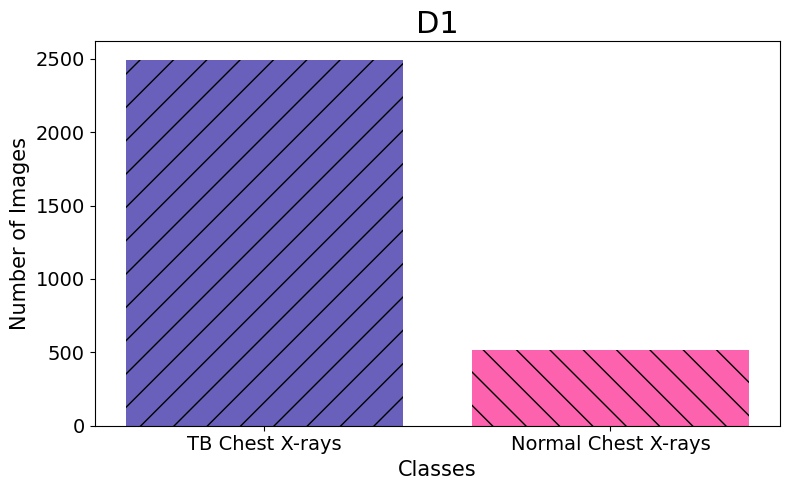

In [5]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import os
import itertools
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset directory
dataset_path = "/kaggle/input/dip-d1/Dataset of Tuberculosis Chest X-rays Images"

plt.style.use('default')

# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count the number of images in each category
image_counts = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    image_counts.append(len(image_files))

# Create a dataframe to show the number of images per class
data = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(data)


# Create a bar chart to visualize the number of images in each category
plt.figure(figsize=(8, 5))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"]  # Define patterns for bars
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]  # Generate unique colors
bars = plt.bar(categories, image_counts, color=colors)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("D1", fontsize=22)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('before_augmentation.png', format='png', dpi=600)
plt.show()


          Class  Number of Images
0      TB-Chest              2500
1  Normal-Chest              2500


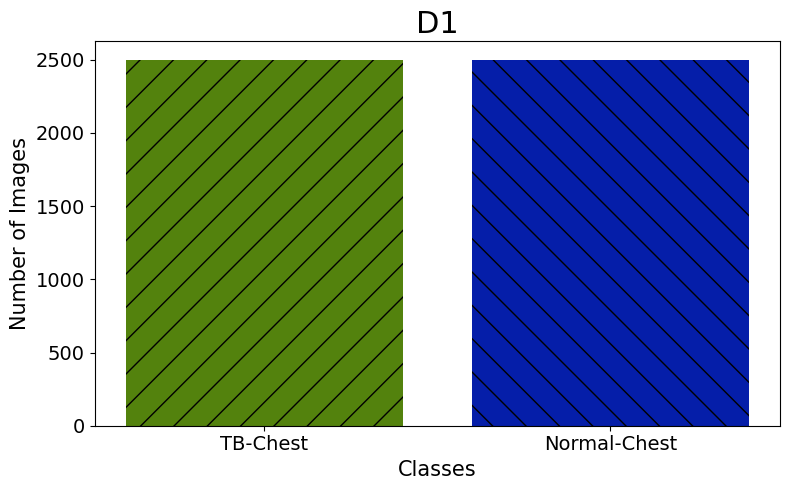

In [6]:
import os
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import os
import itertools
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset directory
dataset_path = "/kaggle/working/Augmented"

plt.style.use('default')

# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count the number of images in each category
image_counts = []
for category in categories:
    category_path = os.path.join(dataset_path, category)
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    image_counts.append(len(image_files))

# Create a dataframe to show the number of images per class
data = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(data)


# Create a bar chart to visualize the number of images in each category
plt.figure(figsize=(8, 5))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"]  # Define patterns for bars
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]  # Generate unique colors
bars = plt.bar(categories, image_counts, color=colors)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("D1", fontsize=22)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('after_augmentation.png', format='png', dpi=600)
plt.show()


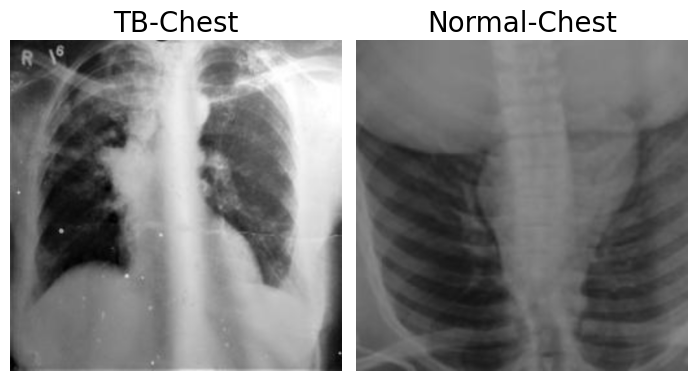

In [7]:
# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Define a transform to resize images and convert them to tensors
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize images to 512x512 for uniformity
    transforms.ToTensor()
])

# Initialize a figure for visualization
plt.figure(figsize=(14, 4))  # Adjusted figure size for better clarity with 2 rows and 4 columns

for i, category in enumerate(categories):
    # Get the path of the category folder
    category_path = os.path.join(dataset_path, category)

    # Get the list of image files in the category folder
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]

    # Ensure there is at least one image in the category
    if not image_files:
        print(f"No images found in category: {category}")
        continue

    # Randomly select an image from the category
    image_path = os.path.join(category_path, random.choice(image_files))
    image = Image.open(image_path).convert("RGB")

    # Apply the transform
    image = transform(image)

    # Convert the tensor back to a PIL image for visualization
    image = transforms.ToPILImage()(image)

    # Add the image to the plot
    plt.subplot(1, 4, i + 1)  # Updated to 2 rows and 4 columns
    plt.imshow(image)
    plt.title(category, fontsize=20)  # Increased font size for category labels
    plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('D1_sample.png', format='png', dpi=600)
plt.show()

# Training

In [8]:
import os
import itertools

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
data_dir = "/kaggle/working/Augmented"

In [10]:
# Custom dataset loader for image data
class CustomImageDataset(Dataset):
    def __init__(self, filepaths, labels, transform=None):
        self.filepaths = filepaths
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.filepaths)
    
    def __getitem__(self, idx):
        image = cv2.imread(self.filepaths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        label = self.labels[idx]
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Load data

def loading_the_data(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)

    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            
            filepaths.append(fpath)
            labels.append(fold)

    return pd.DataFrame({"filepaths": filepaths, "labels": labels})

# data_dir = "F:\\Ml files\\XAI\\Grape\\Combined (D4)"
df = loading_the_data(data_dir)

          Class  Number of Images
0      TB-Chest              2500
1  Normal-Chest              2500


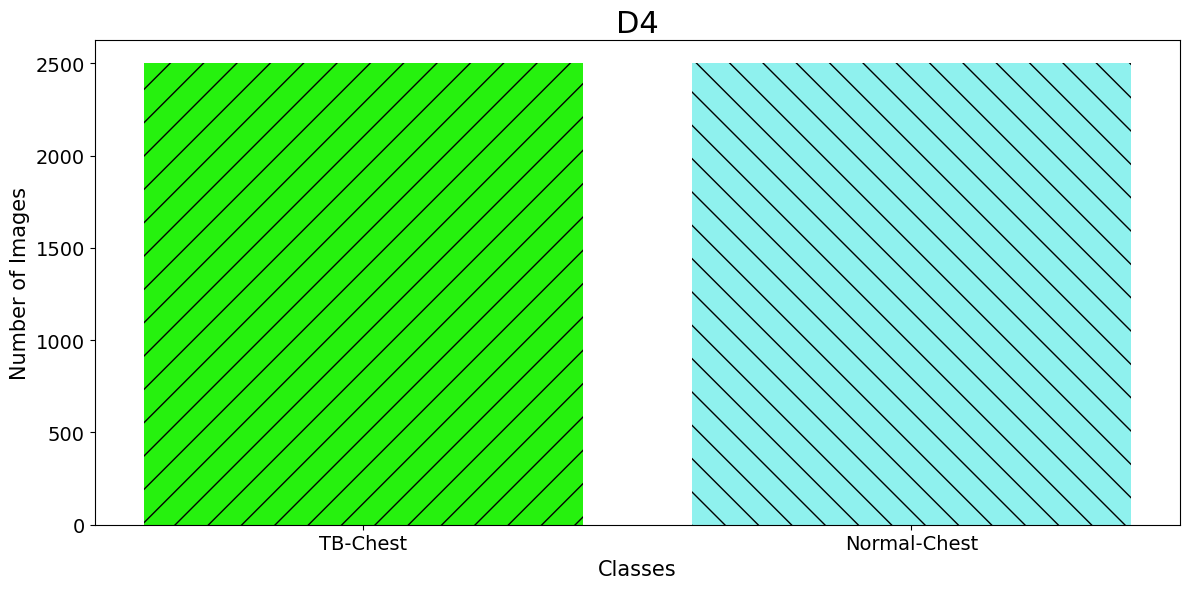

In [11]:
import random
plt.style.use('default')

# Get the list of categories (subfolder names)
categories = [folder for folder in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, folder))]

# Count the number of images in each category
image_counts = []
for category in categories:
    category_path = os.path.join(data_dir, category)
    image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    image_counts.append(len(image_files))

# Create a dataframe to show the number of images per class
data = pd.DataFrame({"Class": categories, "Number of Images": image_counts})
print(data)


# Create a bar chart to visualize the number of images in each category
plt.figure(figsize=(12, 6))
patterns = ["/", "\\", "|", "-", "+", "x", "o", "*"]  # Define patterns for bars
colors = ["#" + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in categories]  # Generate unique colors
bars = plt.bar(categories, image_counts, color=colors)
for bar, pattern in zip(bars, patterns):
    bar.set_hatch(pattern)

plt.title("D4", fontsize=22)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Number of Images", fontsize=15)
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('D1_barchart.png', format='png', dpi=600)
plt.show()

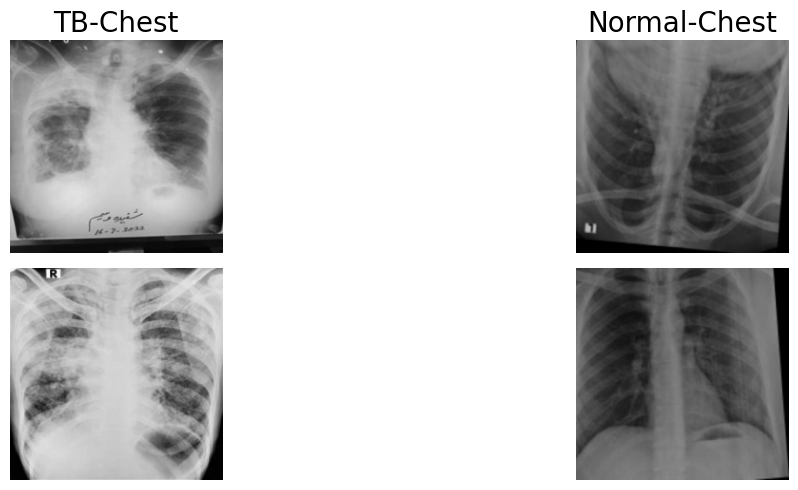

In [12]:
from PIL import Image

# Define a transform to resize images and convert them to tensors
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 512x512 for uniformity
    transforms.ToTensor()
])

# Number of rows and columns
rows, cols = 2, 2

# Ensure categories list contains at least `cols` categories
if len(categories) < cols:
    raise ValueError("Not enough categories to display.")

# Initialize a figure for visualization
plt.figure(figsize=(15, 5))  # Adjusted figure size for better clarity with 2 rows and 5 columns

# Iterate twice to create two rows with different images from the same categories
for row in range(rows):
    for col, category in enumerate(categories[:cols]):  # Use the first `cols` categories
        # Get the path of the category folder
        category_path = os.path.join(data_dir, category)

        # Get the list of image files in the category folder
        image_files = [file for file in os.listdir(category_path) if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]

        # Ensure there is at least one image in the category
        if not image_files:
            print(f"No images found in category: {category}")
            continue

        # Randomly select an image from the category
        image_path = os.path.join(category_path, random.choice(image_files))
        image = Image.open(image_path).convert("RGB")

        # Apply the transform
        image = transform(image)

        # Convert the tensor back to a PIL image for visualization
        image = transforms.ToPILImage()(image)

        # Add the image to the plot
        plt.subplot(rows, cols, row * cols + col + 1)
        plt.imshow(image)
        
        # Set title only for the first row
        if row == 0:
            plt.title(category, fontsize=20)
        
        plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('D1sample.png', format='png', dpi=600)
plt.show()

In [13]:
# Data transformation
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [14]:
# Splitting data
train_df, temp_df = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)  # 80% train, 20% temp
val_df, test_df = train_test_split(temp_df, test_size=0.75, stratify=temp_df['labels'], random_state=42)  # 75% of temp (15% of total) for test

In [15]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(4000, 2)
(250, 2)
(750, 2)


In [16]:
import pandas as pd

# Assuming train_df, val_df, and test_df have a 'labels' column
train_counts = train_df['labels'].value_counts()
val_counts = val_df['labels'].value_counts()
test_counts = test_df['labels'].value_counts()

# Combine into a single DataFrame
class_counts = pd.DataFrame({
    'Training': train_counts,
    'Validation': val_counts,
    'Testing': test_counts
}).fillna(0).astype(int)  # Fill NaN with 0 and convert to integer

# Add a column for total counts (optional)
class_counts['Total'] = class_counts.sum(axis=1)

# Display the table
print(class_counts)


              Training  Validation  Testing  Total
labels                                            
Normal-Chest      2000         125      375   2500
TB-Chest          2000         125      375   2500


In [17]:
# Encoding labels
label_mapping = {label: idx for idx, label in enumerate(df['labels'].unique())}
train_labels = train_df['labels'].map(label_mapping).values
val_labels = val_df['labels'].map(label_mapping).values
test_labels = test_df['labels'].map(label_mapping).values

# Creating datasets and loaders
train_dataset = CustomImageDataset(train_df['filepaths'].values, train_labels, transform=data_transform)
val_dataset = CustomImageDataset(val_df['filepaths'].values, val_labels, transform=data_transform)
test_dataset = CustomImageDataset(test_df['filepaths'].values, test_labels, transform=data_transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=0, pin_memory=True)

In [18]:
# Model setup
if not torch.cuda.is_available():
    raise RuntimeError('CUDA device is not available. Please ensure a GPU is available to train the model.')
device = torch.device('cuda')
device

device(type='cuda')

# Resnext 50

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained ResNeXt-50 model
model = models.resnext50_32x4d(pretrained=True)

# Get the number of input features from the original classifier
num_ftrs = model.fc.in_features

# Replace the classifier (fully connected layer) with a new one
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Adjust output layer to the number of classes
    nn.LogSoftmax(dim=1)
)

# Move the model to the specified device
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Model initialized and ready for training!")


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 211MB/s]


Model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.9569, Validation Accuracy: 0.8480
Epoch 1/20, Loss: 0.1369, Accuracy: 0.9545
Epoch 2/20
----------


Validation Loss: 0.0579, Validation Accuracy: 0.9840
Epoch 2/20, Loss: 0.0801, Accuracy: 0.9738
Epoch 3/20
----------


Validation Loss: 0.0261, Validation Accuracy: 0.9920
Epoch 3/20, Loss: 0.0513, Accuracy: 0.9818
Epoch 4/20
----------


Validation Loss: 0.0323, Validation Accuracy: 0.9880
Epoch 4/20, Loss: 0.0669, Accuracy: 0.9758
Epoch 5/20
----------


Validation Loss: 0.0017, Validation Accuracy: 1.0000
Epoch 5/20, Loss: 0.0235, Accuracy: 0.9912
Epoch 6/20
----------


Validation Loss: 0.0100, Validation Accuracy: 1.0000
Epoch 6/20, Loss: 0.0241, Accuracy: 0.9938
Epoch 7/20
----------


Validation Loss: 0.0054, Validation Accuracy: 1.0000
Epoch 7/20, Loss: 0.0352, Accuracy: 0.9892
Epoch 8/20
----------


Validation Loss: 0.0014, Validation Accuracy: 1.0000
Epoch 8/20, Loss: 0.0519, Accuracy: 0.9845
Epoch 9/20
----------


Validation Loss: 0.0054, Validation Accuracy: 1.0000
Epoch 9/20, Loss: 0.0326, Accuracy: 0.9890
Epoch 10/20
----------


Validation Loss: 0.0126, Validation Accuracy: 0.9960
Epoch 10/20, Loss: 0.0181, Accuracy: 0.9942
Epoch 11/20
----------


Validation Loss: 0.0038, Validation Accuracy: 1.0000
Epoch 11/20, Loss: 0.0382, Accuracy: 0.9865
Epoch 12/20
----------


Validation Loss: 0.0013, Validation Accuracy: 1.0000
Epoch 12/20, Loss: 0.0176, Accuracy: 0.9958
Epoch 13/20
----------


Validation Loss: 0.0010, Validation Accuracy: 1.0000
Epoch 13/20, Loss: 0.0076, Accuracy: 0.9970
Epoch 14/20
----------


Validation Loss: 0.0122, Validation Accuracy: 0.9920
Epoch 14/20, Loss: 0.0180, Accuracy: 0.9955
Epoch 15/20
----------


Validation Loss: 0.0405, Validation Accuracy: 0.9920
Epoch 15/20, Loss: 0.0146, Accuracy: 0.9970
Epoch 16/20
----------


Validation Loss: 0.0152, Validation Accuracy: 0.9960
Epoch 16/20, Loss: 0.0346, Accuracy: 0.9900
Epoch 17/20
----------


Validation Loss: 0.0301, Validation Accuracy: 0.9920
Epoch 17/20, Loss: 0.0401, Accuracy: 0.9902
Epoch 18/20
----------


Validation Loss: 0.0016, Validation Accuracy: 1.0000
Epoch 18/20, Loss: 0.0330, Accuracy: 0.9910
Epoch 19/20
----------


Validation Loss: 0.0052, Validation Accuracy: 1.0000
Epoch 19/20, Loss: 0.0201, Accuracy: 0.9935
Epoch 20/20
----------


Validation Loss: 0.0003, Validation Accuracy: 1.0000
Epoch 20/20, Loss: 0.0135, Accuracy: 0.9955


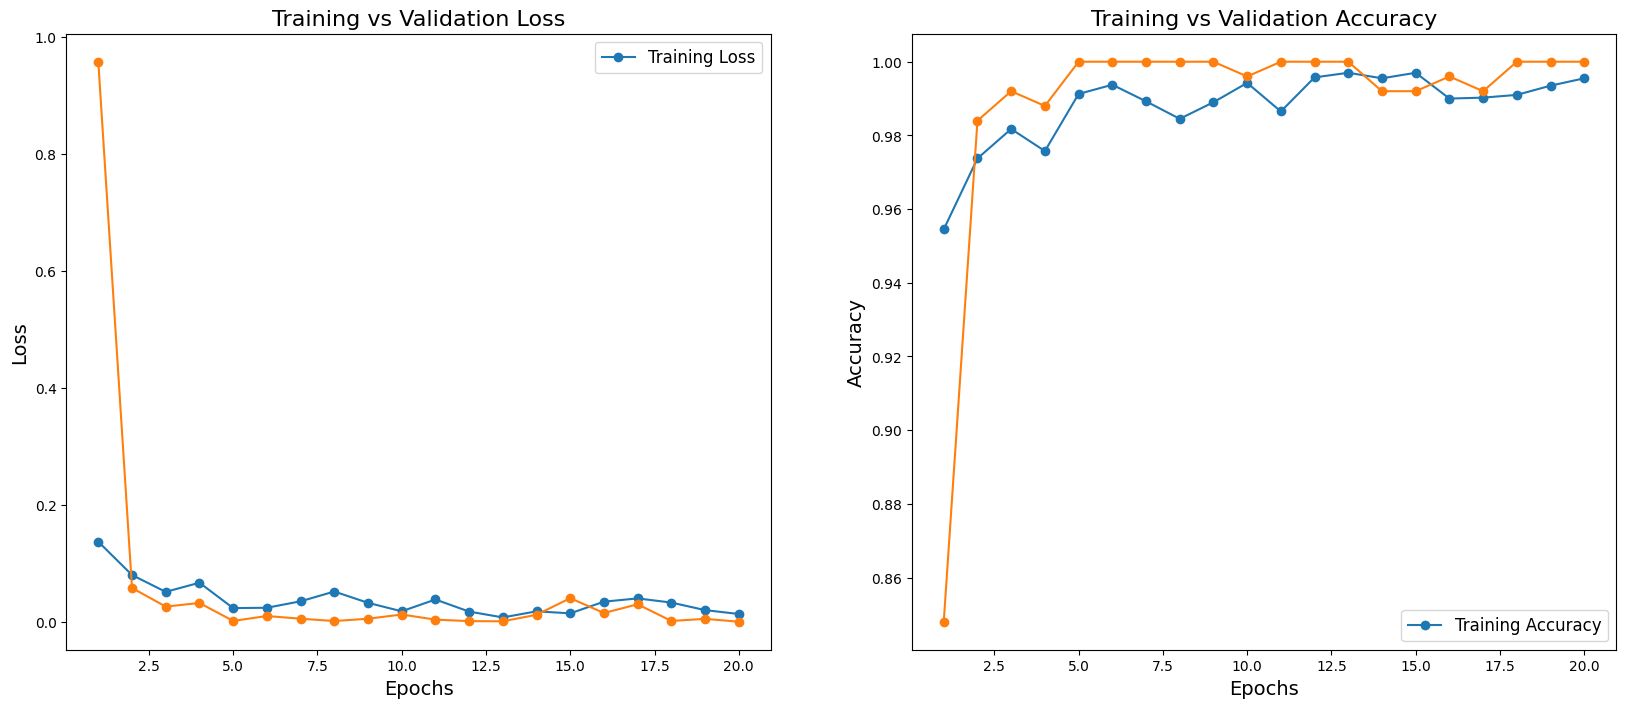

In [20]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[125   0]
 [  0 125]]


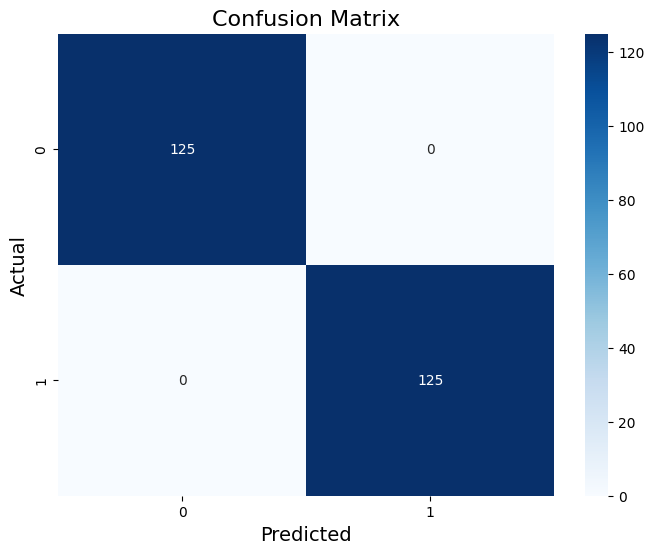

Specificity: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000
F1 Score: 1.0000
PR AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [21]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [22]:
# Save the model
torch.save(model.state_dict(), "resnext50.pth")

In [23]:
model_resnetx50 = model

# DenseNet-201

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the pretrained DenseNet-201 model
model = models.densenet201(pretrained=True)

# Get the number of input features from the original classifier
num_ftrs = model.classifier.in_features  # DenseNet uses a `classifier` instead of `fc`

# Replace the classifier (fully connected layer) with a new one
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Adjust output layer to the number of classes
    nn.LogSoftmax(dim=1)
)

# Move the model to the specified device
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("DenseNet-201 model initialized and ready for training!")


Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 165MB/s]


DenseNet-201 model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.4817, Validation Accuracy: 0.9120
Epoch 1/20, Loss: 0.1364, Accuracy: 0.9537
Epoch 2/20
----------


Validation Loss: 0.0247, Validation Accuracy: 0.9880
Epoch 2/20, Loss: 0.0875, Accuracy: 0.9728
Epoch 3/20
----------


Validation Loss: 0.0063, Validation Accuracy: 1.0000
Epoch 3/20, Loss: 0.0641, Accuracy: 0.9802
Epoch 4/20
----------


Validation Loss: 0.0028, Validation Accuracy: 1.0000
Epoch 4/20, Loss: 0.0425, Accuracy: 0.9858
Epoch 5/20
----------


Validation Loss: 0.0145, Validation Accuracy: 0.9960
Epoch 5/20, Loss: 0.0426, Accuracy: 0.9890
Epoch 6/20
----------


Validation Loss: 0.0421, Validation Accuracy: 0.9880
Epoch 6/20, Loss: 0.0311, Accuracy: 0.9920
Epoch 7/20
----------


Validation Loss: 0.0140, Validation Accuracy: 1.0000
Epoch 7/20, Loss: 0.0483, Accuracy: 0.9870
Epoch 8/20
----------


Validation Loss: 0.0109, Validation Accuracy: 0.9960
Epoch 8/20, Loss: 0.0196, Accuracy: 0.9942
Epoch 9/20
----------


Validation Loss: 0.0008, Validation Accuracy: 1.0000
Epoch 9/20, Loss: 0.0344, Accuracy: 0.9905
Epoch 10/20
----------


Validation Loss: 0.0007, Validation Accuracy: 1.0000
Epoch 10/20, Loss: 0.0228, Accuracy: 0.9922
Epoch 11/20
----------


Validation Loss: 0.0226, Validation Accuracy: 0.9920
Epoch 11/20, Loss: 0.0112, Accuracy: 0.9968
Epoch 12/20
----------


Validation Loss: 0.0013, Validation Accuracy: 1.0000
Epoch 12/20, Loss: 0.0250, Accuracy: 0.9930
Epoch 13/20
----------


Validation Loss: 0.0842, Validation Accuracy: 0.9680
Epoch 13/20, Loss: 0.0322, Accuracy: 0.9918
Epoch 14/20
----------


Validation Loss: 0.0105, Validation Accuracy: 0.9960
Epoch 14/20, Loss: 0.0297, Accuracy: 0.9928
Epoch 15/20
----------


Validation Loss: 0.0045, Validation Accuracy: 0.9960
Epoch 15/20, Loss: 0.0206, Accuracy: 0.9950
Epoch 16/20
----------


Validation Loss: 0.0376, Validation Accuracy: 0.9880
Epoch 16/20, Loss: 0.0110, Accuracy: 0.9972
Epoch 17/20
----------


Validation Loss: 0.0016, Validation Accuracy: 1.0000
Epoch 17/20, Loss: 0.0162, Accuracy: 0.9948
Epoch 18/20
----------


Validation Loss: 0.0026, Validation Accuracy: 1.0000
Epoch 18/20, Loss: 0.0070, Accuracy: 0.9985
Epoch 19/20
----------


Validation Loss: 0.0001, Validation Accuracy: 1.0000
Epoch 19/20, Loss: 0.0157, Accuracy: 0.9960
Epoch 20/20
----------


Validation Loss: 0.0044, Validation Accuracy: 0.9960
Epoch 20/20, Loss: 0.0190, Accuracy: 0.9945


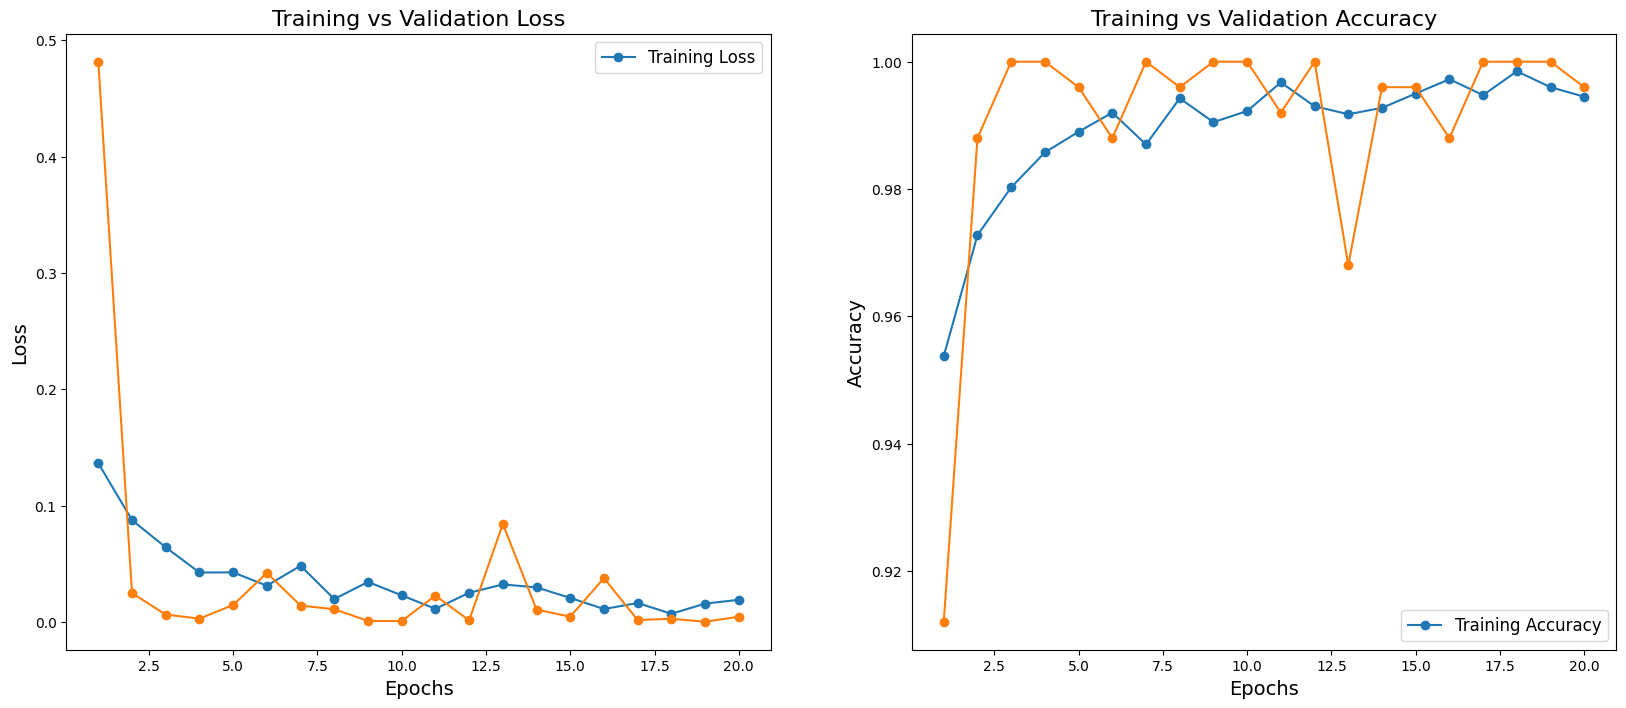

In [25]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[124   1]
 [  0 125]]


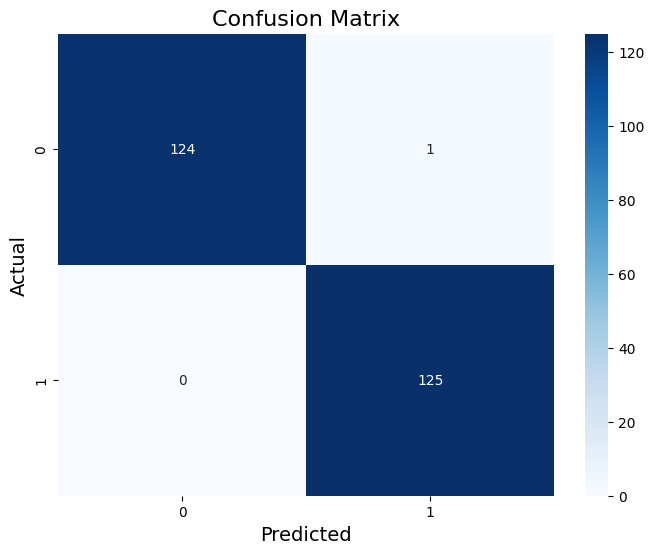

Specificity: 0.9920
Matthews Correlation Coefficient (MCC): 0.9920
F1 Score: 0.9960
PR AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       125
           1       0.99      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [26]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [27]:
# Save the model
torch.save(model.state_dict(), "densenet201.pth")

In [28]:
model_densenet201 = model

# ShuffleNet v2

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ShuffleNet v2 (1.0x output channels)
model = models.shufflenet_v2_x1_0(pretrained=True)

# Get the number of input features to the classifier
num_ftrs = model.fc.in_features  # For ShuffleNet, the classifier is `fc`

# Replace the classifier
model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

# Move model to device
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("ShuffleNet v2 model (via torchvision) initialized and ready for training!")


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 96.2MB/s]


ShuffleNet v2 model (via torchvision) initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.0084, Validation Accuracy: 0.9920
Epoch 1/20, Loss: 0.0851, Accuracy: 0.9750
Epoch 2/20
----------


Validation Loss: 0.0052, Validation Accuracy: 1.0000
Epoch 2/20, Loss: 0.0304, Accuracy: 0.9902
Epoch 3/20
----------


Validation Loss: 0.0025, Validation Accuracy: 1.0000
Epoch 3/20, Loss: 0.0126, Accuracy: 0.9962
Epoch 4/20
----------


Validation Loss: 0.0013, Validation Accuracy: 1.0000
Epoch 4/20, Loss: 0.0126, Accuracy: 0.9962
Epoch 5/20
----------


Validation Loss: 0.0070, Validation Accuracy: 0.9960
Epoch 5/20, Loss: 0.0260, Accuracy: 0.9940
Epoch 6/20
----------


Validation Loss: 0.0147, Validation Accuracy: 0.9960
Epoch 6/20, Loss: 0.0045, Accuracy: 0.9985
Epoch 7/20
----------


Validation Loss: 0.0136, Validation Accuracy: 0.9960
Epoch 7/20, Loss: 0.0181, Accuracy: 0.9948
Epoch 8/20
----------


Validation Loss: 0.0051, Validation Accuracy: 0.9960
Epoch 8/20, Loss: 0.0071, Accuracy: 0.9970
Epoch 9/20
----------


Validation Loss: 0.0019, Validation Accuracy: 1.0000
Epoch 9/20, Loss: 0.0076, Accuracy: 0.9968
Epoch 10/20
----------


Validation Loss: 0.0107, Validation Accuracy: 0.9960
Epoch 10/20, Loss: 0.0167, Accuracy: 0.9952
Epoch 11/20
----------


Validation Loss: 0.0046, Validation Accuracy: 0.9960
Epoch 11/20, Loss: 0.0073, Accuracy: 0.9975
Epoch 12/20
----------


Validation Loss: 0.0005, Validation Accuracy: 1.0000
Epoch 12/20, Loss: 0.0013, Accuracy: 0.9998
Epoch 13/20
----------


Validation Loss: 0.0003, Validation Accuracy: 1.0000
Epoch 13/20, Loss: 0.0002, Accuracy: 1.0000
Epoch 14/20
----------


Validation Loss: 0.0122, Validation Accuracy: 0.9960
Epoch 14/20, Loss: 0.0010, Accuracy: 0.9995
Epoch 15/20
----------


Validation Loss: 0.0029, Validation Accuracy: 1.0000
Epoch 15/20, Loss: 0.0123, Accuracy: 0.9960
Epoch 16/20
----------


Validation Loss: 0.0145, Validation Accuracy: 0.9960
Epoch 16/20, Loss: 0.0115, Accuracy: 0.9965
Epoch 17/20
----------


Validation Loss: 0.0002, Validation Accuracy: 1.0000
Epoch 17/20, Loss: 0.0011, Accuracy: 1.0000
Epoch 18/20
----------


Validation Loss: 0.0010, Validation Accuracy: 1.0000
Epoch 18/20, Loss: 0.0015, Accuracy: 0.9995
Epoch 19/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 19/20, Loss: 0.0007, Accuracy: 0.9998
Epoch 20/20
----------


Validation Loss: 0.0012, Validation Accuracy: 1.0000
Epoch 20/20, Loss: 0.0148, Accuracy: 0.9970


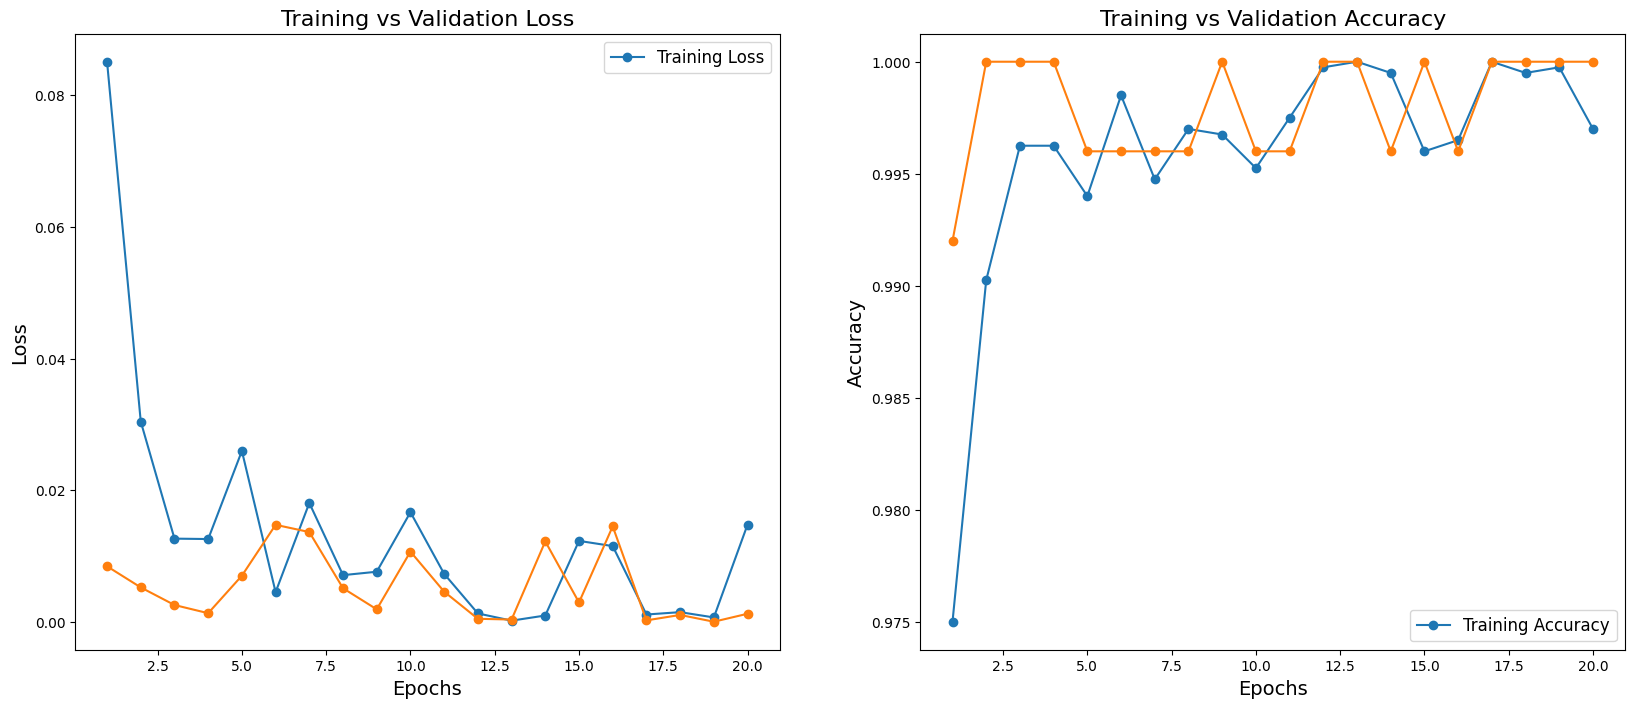

In [30]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[125   0]
 [  0 125]]


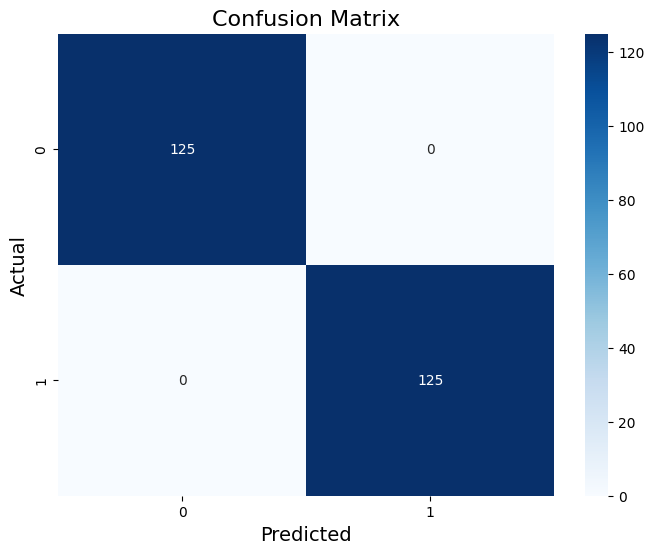

Specificity: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000
F1 Score: 1.0000
PR AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [31]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [32]:
# Save the model
torch.save(model.state_dict(), "ShuffleNet_v2.pth")

In [33]:
model_ShuffleNet_v2 = model

# NASNet-Mobile

In [34]:
pip install pretrainedmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=3a864a82d916d37c405eb150427270f1485468b2e95b739c158580c03db71d41
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built pretrainedmodels
Note: you may need to restart the kernel to use updated packages.


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from pretrainedmodels import nasnetamobile  # Third-party library

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained NASNet-Mobile
model = nasnetamobile(num_classes=1000, pretrained='imagenet')

# Get number of input features to the final layer
num_ftrs = model.last_linear.in_features

# Replace the final layer
model.last_linear = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

# Move model to device
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("NASNet-Mobile model initialized and ready for training!")

Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/nasnetamobile-7e03cead.pth" to /root/.cache/torch/hub/checkpoints/nasnetamobile-7e03cead.pth
100%|██████████| 20.5M/20.5M [00:01<00:00, 15.7MB/s]


NASNet-Mobile model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.0072, Validation Accuracy: 1.0000
Epoch 1/20, Loss: 0.0869, Accuracy: 0.9712
Epoch 2/20
----------


Validation Loss: 0.0003, Validation Accuracy: 1.0000
Epoch 2/20, Loss: 0.0131, Accuracy: 0.9965
Epoch 3/20
----------


Validation Loss: 0.0091, Validation Accuracy: 0.9960
Epoch 3/20, Loss: 0.0190, Accuracy: 0.9938
Epoch 4/20
----------


Validation Loss: 0.0090, Validation Accuracy: 0.9960
Epoch 4/20, Loss: 0.0137, Accuracy: 0.9960
Epoch 5/20
----------


Validation Loss: 0.0656, Validation Accuracy: 0.9880
Epoch 5/20, Loss: 0.0900, Accuracy: 0.9798
Epoch 6/20
----------


Validation Loss: 0.0009, Validation Accuracy: 1.0000
Epoch 6/20, Loss: 0.0287, Accuracy: 0.9930
Epoch 7/20
----------


Validation Loss: 0.0003, Validation Accuracy: 1.0000
Epoch 7/20, Loss: 0.0067, Accuracy: 0.9985
Epoch 8/20
----------


Validation Loss: 0.0063, Validation Accuracy: 0.9960
Epoch 8/20, Loss: 0.0084, Accuracy: 0.9972
Epoch 9/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 9/20, Loss: 0.0060, Accuracy: 0.9975
Epoch 10/20
----------


Validation Loss: 0.0002, Validation Accuracy: 1.0000
Epoch 10/20, Loss: 0.0002, Accuracy: 1.0000
Epoch 11/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 11/20, Loss: 0.0004, Accuracy: 1.0000
Epoch 12/20
----------


Validation Loss: 0.0001, Validation Accuracy: 1.0000
Epoch 12/20, Loss: 0.0000, Accuracy: 1.0000
Epoch 13/20
----------


Validation Loss: 0.0002, Validation Accuracy: 1.0000
Epoch 13/20, Loss: 0.0000, Accuracy: 1.0000
Epoch 14/20
----------


Validation Loss: 0.0807, Validation Accuracy: 0.9840
Epoch 14/20, Loss: 0.0866, Accuracy: 0.9802
Epoch 15/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 15/20, Loss: 0.0208, Accuracy: 0.9948
Epoch 16/20
----------


Validation Loss: 0.0012, Validation Accuracy: 1.0000
Epoch 16/20, Loss: 0.0134, Accuracy: 0.9970
Epoch 17/20
----------


Validation Loss: 0.0007, Validation Accuracy: 1.0000
Epoch 17/20, Loss: 0.0076, Accuracy: 0.9980
Epoch 18/20
----------


Validation Loss: 0.0136, Validation Accuracy: 0.9920
Epoch 18/20, Loss: 0.0107, Accuracy: 0.9985
Epoch 19/20
----------


Validation Loss: 0.0033, Validation Accuracy: 0.9960
Epoch 19/20, Loss: 0.0151, Accuracy: 0.9965
Epoch 20/20
----------


Validation Loss: 0.5229, Validation Accuracy: 0.9560
Epoch 20/20, Loss: 0.0986, Accuracy: 0.9952


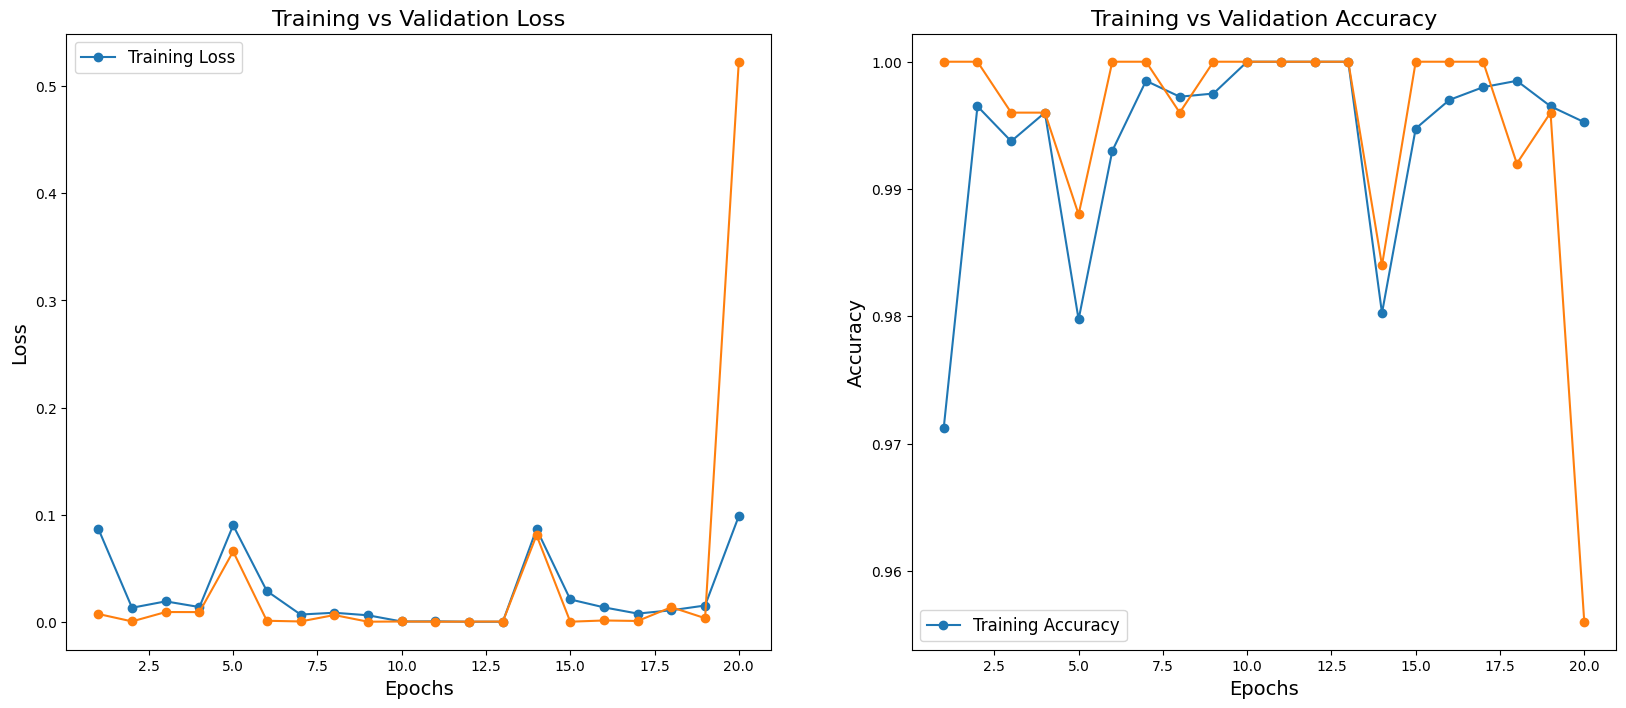

In [36]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[114  11]
 [  0 125]]


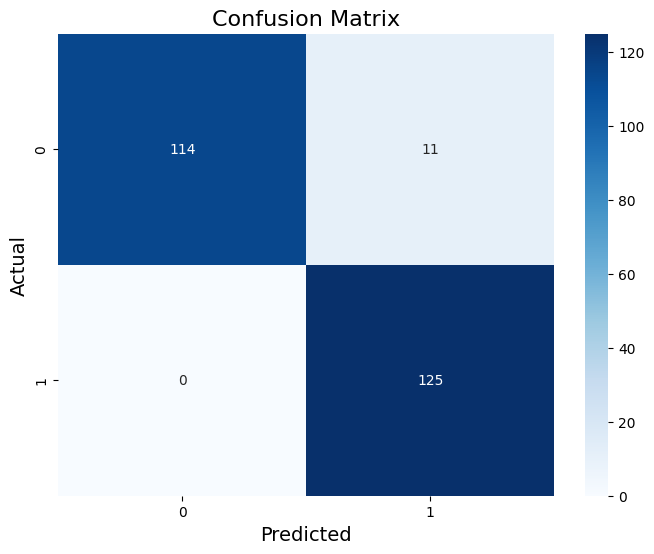

Specificity: 0.9120
Matthews Correlation Coefficient (MCC): 0.9156
F1 Score: 0.9559
PR AUC: 0.9917

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       125
           1       0.92      1.00      0.96       125

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [37]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [38]:
# Save the model
torch.save(model.state_dict(), "nasnetmobile.pth")

In [39]:
model_nasnetlarge = model

Ghost Net 100

In [40]:
import timm
import torch.nn as nn

# Create model
model = timm.create_model('ghostnet_100', pretrained=True)

# Get the number of features in the final layer
num_ftrs = model.classifier.in_features  # Access the classifier's input features

# Replace the final classification layer
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Ghost Net model initialized and ready for training!")

model.safetensors:   0%|          | 0.00/20.9M [00:00<?, ?B/s]

Ghost Net model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 0.0076, Validation Accuracy: 0.9960
Epoch 1/20, Loss: 0.0656, Accuracy: 0.9818
Epoch 2/20
----------


Validation Loss: 0.0090, Validation Accuracy: 0.9920
Epoch 2/20, Loss: 0.0315, Accuracy: 0.9940
Epoch 3/20
----------


Validation Loss: 0.0011, Validation Accuracy: 1.0000
Epoch 3/20, Loss: 0.0245, Accuracy: 0.9942
Epoch 4/20
----------


Validation Loss: 0.0128, Validation Accuracy: 0.9960
Epoch 4/20, Loss: 0.0014, Accuracy: 0.9992
Epoch 5/20
----------


Validation Loss: 0.0073, Validation Accuracy: 0.9960
Epoch 5/20, Loss: 0.0113, Accuracy: 0.9975
Epoch 6/20
----------


Validation Loss: 0.0018, Validation Accuracy: 1.0000
Epoch 6/20, Loss: 0.0155, Accuracy: 0.9955
Epoch 7/20
----------


Validation Loss: 0.0003, Validation Accuracy: 1.0000
Epoch 7/20, Loss: 0.0080, Accuracy: 0.9982
Epoch 8/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 8/20, Loss: 0.0011, Accuracy: 0.9995
Epoch 9/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 9/20, Loss: 0.0055, Accuracy: 0.9988
Epoch 10/20
----------


Validation Loss: 0.0002, Validation Accuracy: 1.0000
Epoch 10/20, Loss: 0.0215, Accuracy: 0.9955
Epoch 11/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 11/20, Loss: 0.0147, Accuracy: 0.9960
Epoch 12/20
----------


Validation Loss: 0.0001, Validation Accuracy: 1.0000
Epoch 12/20, Loss: 0.0081, Accuracy: 0.9975
Epoch 13/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 13/20, Loss: 0.0021, Accuracy: 0.9992
Epoch 14/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 14/20, Loss: 0.0032, Accuracy: 0.9992
Epoch 15/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 15/20, Loss: 0.0005, Accuracy: 0.9998
Epoch 16/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 16/20, Loss: 0.0009, Accuracy: 0.9998
Epoch 17/20
----------


Validation Loss: 0.0021, Validation Accuracy: 1.0000
Epoch 17/20, Loss: 0.1075, Accuracy: 0.9895
Epoch 18/20
----------


Validation Loss: 0.0005, Validation Accuracy: 1.0000
Epoch 18/20, Loss: 0.0288, Accuracy: 0.9930
Epoch 19/20
----------


Validation Loss: 0.0101, Validation Accuracy: 0.9960
Epoch 19/20, Loss: 0.0091, Accuracy: 0.9978
Epoch 20/20
----------


Validation Loss: 0.0000, Validation Accuracy: 1.0000
Epoch 20/20, Loss: 0.0050, Accuracy: 0.9978


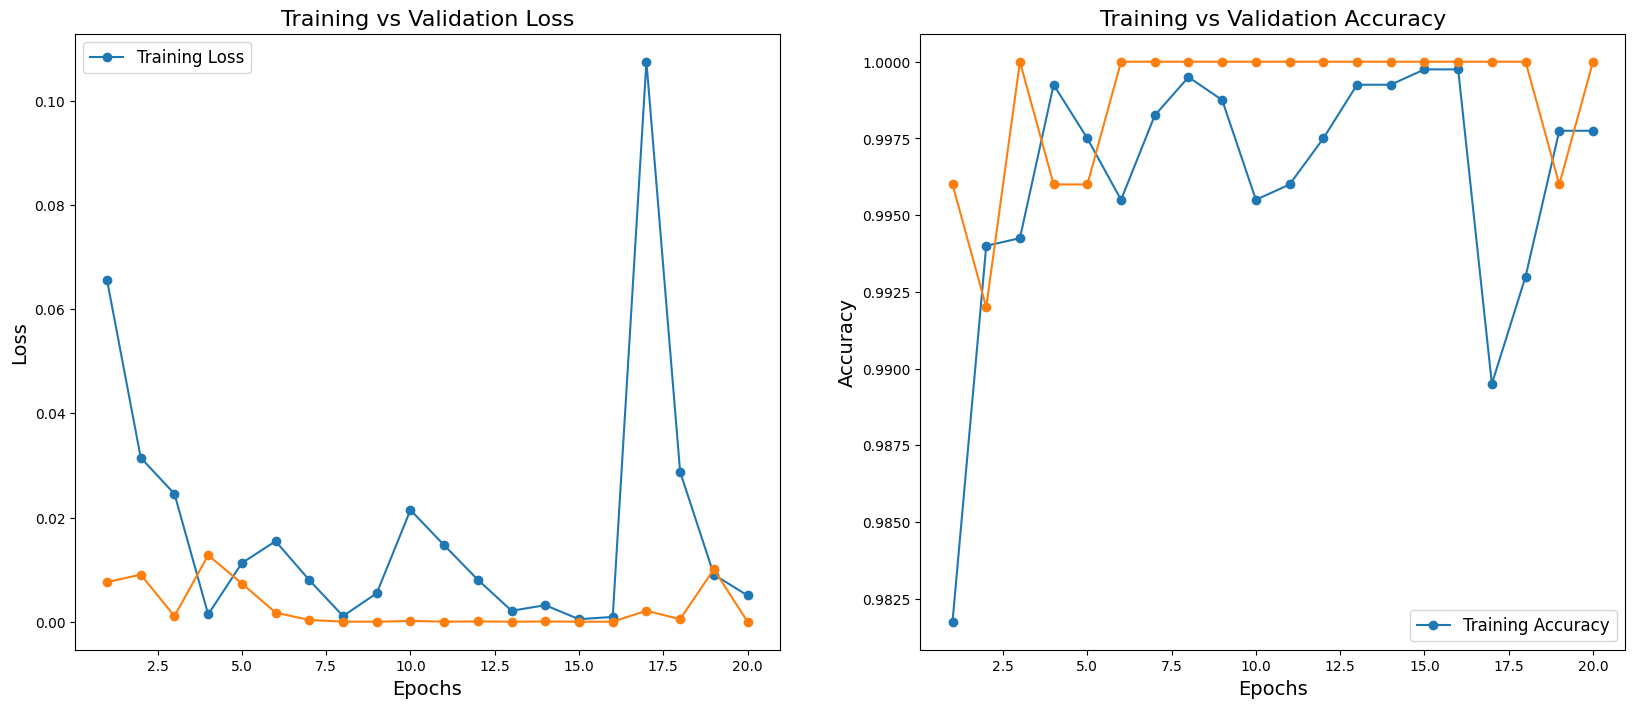

In [41]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[125   0]
 [  0 125]]


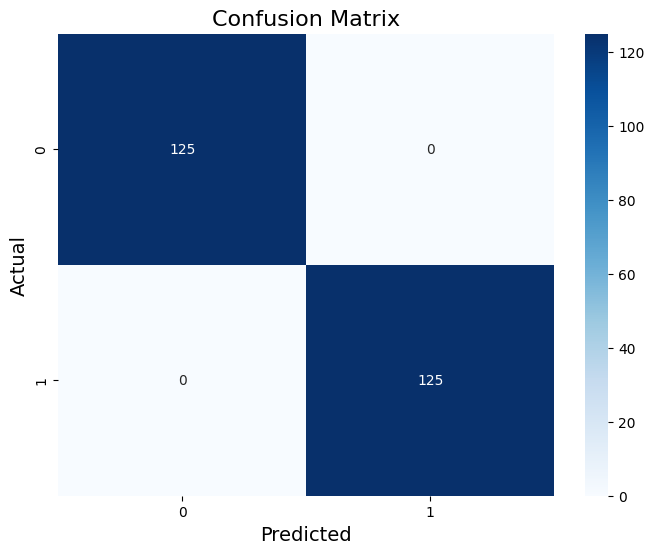

Specificity: 1.0000
Matthews Correlation Coefficient (MCC): 1.0000
F1 Score: 1.0000
PR AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [42]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [43]:
# Save the model
torch.save(model.state_dict(), "ghostnet.pth")

In [44]:
model_ghostnet = model

# Dark Net

In [45]:
import timm
import torch.nn as nn

# Install first: pip install timm

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load DarkNet-53
model = timm.create_model('darknet53', pretrained=True)

# Replace head (verify layer name with print(model))
num_ftrs = model.head.fc.in_features
model.head.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, len(label_mapping)),  # Use your actual number of classes
    nn.LogSoftmax(dim=1)
)

model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("Dark Net model initialized and ready for training!")

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Dark Net model initialized and ready for training!


Epoch 1/20
----------


Validation Loss: 28.0455, Validation Accuracy: 0.7400
Epoch 1/20, Loss: 0.2215, Accuracy: 0.9417
Epoch 2/20
----------


Validation Loss: 0.0169, Validation Accuracy: 0.9960
Epoch 2/20, Loss: 0.1013, Accuracy: 0.9645
Epoch 3/20
----------


Validation Loss: 0.0065, Validation Accuracy: 1.0000
Epoch 3/20, Loss: 0.0484, Accuracy: 0.9852
Epoch 4/20
----------


Validation Loss: 0.0103, Validation Accuracy: 0.9960
Epoch 4/20, Loss: 0.0530, Accuracy: 0.9842
Epoch 5/20
----------


Validation Loss: 0.0105, Validation Accuracy: 0.9960
Epoch 5/20, Loss: 0.0320, Accuracy: 0.9882
Epoch 6/20
----------


Validation Loss: 0.0112, Validation Accuracy: 0.9960
Epoch 6/20, Loss: 0.0313, Accuracy: 0.9892
Epoch 7/20
----------


Validation Loss: 0.0102, Validation Accuracy: 0.9920
Epoch 7/20, Loss: 0.0188, Accuracy: 0.9950
Epoch 8/20
----------


Validation Loss: 0.0118, Validation Accuracy: 0.9960
Epoch 8/20, Loss: 0.0470, Accuracy: 0.9880
Epoch 9/20
----------


Validation Loss: 0.0309, Validation Accuracy: 0.9880
Epoch 9/20, Loss: 0.0290, Accuracy: 0.9920
Epoch 10/20
----------


Validation Loss: 0.0126, Validation Accuracy: 0.9920
Epoch 10/20, Loss: 0.0100, Accuracy: 0.9980
Epoch 11/20
----------


Validation Loss: 0.0255, Validation Accuracy: 0.9920
Epoch 11/20, Loss: 0.0258, Accuracy: 0.9930
Epoch 12/20
----------


Validation Loss: 0.0126, Validation Accuracy: 0.9960
Epoch 12/20, Loss: 0.0208, Accuracy: 0.9942
Epoch 13/20
----------


Validation Loss: 0.0005, Validation Accuracy: 1.0000
Epoch 13/20, Loss: 0.0176, Accuracy: 0.9948
Epoch 14/20
----------


Validation Loss: 0.0331, Validation Accuracy: 0.9920
Epoch 14/20, Loss: 0.0175, Accuracy: 0.9948
Epoch 15/20
----------


Validation Loss: 0.0536, Validation Accuracy: 0.9880
Epoch 15/20, Loss: 0.0148, Accuracy: 0.9952
Epoch 16/20
----------


Validation Loss: 0.4664, Validation Accuracy: 0.8720
Epoch 16/20, Loss: 0.0193, Accuracy: 0.9940
Epoch 17/20
----------


Validation Loss: 0.0176, Validation Accuracy: 0.9920
Epoch 17/20, Loss: 0.0194, Accuracy: 0.9958
Epoch 18/20
----------


Validation Loss: 0.0384, Validation Accuracy: 0.9920
Epoch 18/20, Loss: 0.0186, Accuracy: 0.9932
Epoch 19/20
----------


Validation Loss: 0.0773, Validation Accuracy: 0.9800
Epoch 19/20, Loss: 0.0197, Accuracy: 0.9945
Epoch 20/20
----------


Validation Loss: 0.1355, Validation Accuracy: 0.9400
Epoch 20/20, Loss: 0.0444, Accuracy: 0.9865


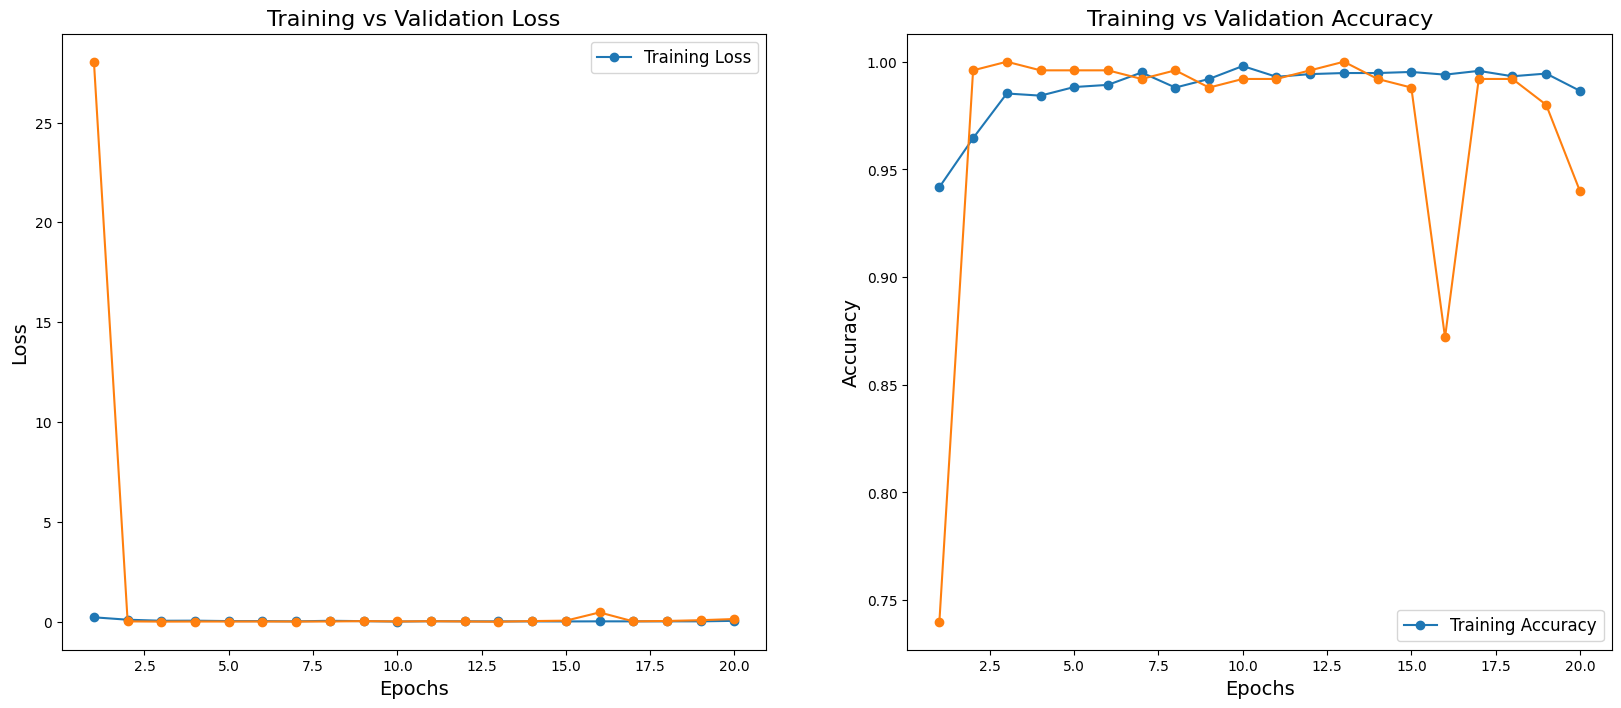

In [46]:
# Training function with learning curve
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    model.train()
    train_losses = []
    train_accuracies = []
    val_losses= []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        model.train()
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader, desc='Training', leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        val_loss = val_running_loss / len(val_loader.dataset)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    # Plot learning curve
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label='Training Loss')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Loss', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_losses, marker='o', label='Validation Loss')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, marker='o', label='Training Accuracy')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(fontsize=12)
    plt.title('Training vs Validation Accuracy', fontsize=16)
    plt.plot(range(1, num_epochs + 1), val_accuracies, marker='o', label='Validation Accuracy')
    plt.show()

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=20)

Confusion Matrix:
[[124   1]
 [ 14 111]]


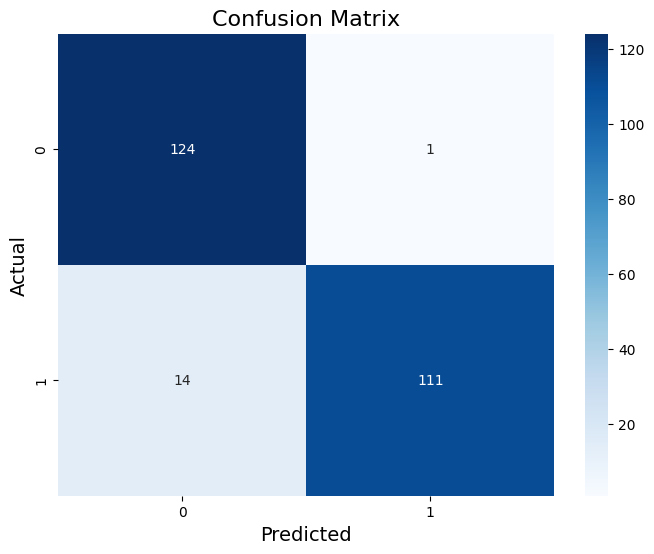

Specificity: 0.9920
Matthews Correlation Coefficient (MCC): 0.8848
F1 Score: 0.9398
PR AUC: 0.9983

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       125
           1       0.99      0.89      0.94       125

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [47]:
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef, f1_score, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, data_loader):
    model.eval()
    all_labels = []
    all_preds = []
    all_probs = []

    # Try to fetch class names from dataset
    try:
        class_names = data_loader.dataset.classes
    except AttributeError:
        class_names = None

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Use softmax for multi-class
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

            # For PR-AUC: assuming binary — take class 1 probability
            if probs.shape[1] == 2:
                all_probs.extend(probs[:, 1].cpu().numpy())
            else:
                all_probs.extend(probs.cpu().numpy())  # Multi-class: you can adjust this

    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # --- Confusion Matrix ---
    cm = confusion_matrix(all_labels, all_preds)
    print("Confusion Matrix:")
    print(cm)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names if class_names else np.arange(len(cm)),
                yticklabels=class_names if class_names else np.arange(len(cm)))
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.show()

    # --- Specificity ---
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificity: {specificity:.4f}")
    else:
        print("Specificity is only defined for binary classification.")

    # --- Matthews Correlation Coefficient ---
    mcc = matthews_corrcoef(all_labels, all_preds)
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # --- F1 Score ---
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f"F1 Score: {f1:.4f}")

    # --- PR AUC ---
    if len(np.unique(all_labels)) == 2:
        precision, recall, _ = precision_recall_curve(all_labels, np.array(all_probs))
        pr_auc = auc(recall, precision)
        print(f"PR AUC: {pr_auc:.4f}")
    else:
        print("PR AUC is usually computed for binary classification.")

    # --- Classification Report ---
    report = classification_report(all_labels, all_preds, target_names=class_names if class_names else None)
    print("\nClassification Report:\n", report)
    
evaluate_model(model, val_loader)

In [48]:
# Save the model
torch.save(model.state_dict(), "darknet.pth")

In [49]:
model_darknet = model